# 데이터 분석 실무2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# 한글 찍기
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family = 'Malgun Gothic')   # 또는 '맑은 고딕'
else:
    print('Unknown system... sorry~~~~')

## subwayfee.csv 파일을 통한 지하철 유무임별 승하차 인원 현황 데이터 분석

- 자료출처 : t-money.co.kr 에서 자료를 제공함. encoding = 'cp949'

In [3]:
df = pd.read_csv('./datas/subwayfee.csv', encoding='cp949')

In [4]:
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687
...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     598 non-null    object
 1   호선명     598 non-null    object
 2   역ID     598 non-null    int64 
 3   지하철역    598 non-null    object
 4   유임승차    598 non-null    int64 
 5   유임하차    598 non-null    int64 
 6   무임승차    598 non-null    int64 
 7   무임하차    598 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 37.5+ KB


In [6]:
df['사용월'].unique()

array(['2019-01'], dtype=object)

In [7]:
df['호선명'].nunique()

25

In [8]:
df.shape

(598, 8)

In [9]:
df['역ID'].nunique()

598

In [10]:
df['지하철역'].nunique()

509

In [11]:
df['지하철역'].value_counts()

지하철역
서울역         6
홍대입구        4
공덕          4
김포공항        4
종로3가        3
           ..
서초          1
잠실새내        1
방배          1
삼성(무역센터)    1
종각          1
Name: count, Length: 509, dtype: int64

In [12]:
df['지하철역'] == '서울역'

0       True
1      False
2      False
3      False
4      False
       ...  
593    False
594    False
595    False
596    False
597    False
Name: 지하철역, Length: 598, dtype: bool

In [13]:
df.loc[ df['지하철역'] == '서울역' , ] 

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
111,2019-01,4호선,426,서울역,367040,634814,42165,53241
120,2019-01,경부선,1001,서울역,178223,29980,10325,1612
303,2019-01,경의선,1251,서울역,94475,118708,12831,16661
328,2019-01,경의선,1291,서울역,11,0,0,0
558,2019-01,공항철도 1호선,4201,서울역,361418,297358,34330,31219


## 실습 0. 유임승차, 유임하차, 무임승차, 무임하차 4가지 별로, 각각 가장 많은 역을 찾아보세요.

In [14]:
# 유임승차 가장 많은 역

In [15]:
df.head(3)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062


In [16]:
# 방법1
df.loc[df['유임승차'] == df['유임승차'].max()  , ]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
31,2019-01,2호선,222,강남,3153418,3210437,186486,167666


In [17]:
# 방법2 : 정렬 방식
df.sort_values('유임승차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
31,2019-01,2호선,222,강남,3153418,3210437,186486,167666


In [ ]:
# 유임하차 가장 많은 역
df.sort_values('유임하차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
31,2019-01,2호선,222,강남,3153418,3210437,186486,167666


In [22]:
# 무임하차 가장 많은 역
df.loc[  df['무임하차']  == df['무임하차'].max()  ,  ]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
7,2019-01,1호선,157,제기동,293540,288217,374571,400607


## 실습 1. 무임승차 대비 유임승차 비율이 가장 높은 역은 어디입니까?

In [23]:
df.head(3)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062


In [24]:
# 무임승차 대비 유임승차 비율  = 유임승차 / 무임승차 
df['비율'] = df['유임승차'] / df['무임승차']

In [25]:
df['비율'].max()

np.float64(inf)

In [26]:
df.sort_values('비율', ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
329,2019-01,경의선,1293,홍대입구,2,0,0,0,inf
330,2019-01,경의선,1295,김포공항,10,0,0,0,inf
331,2019-01,경의선,1296,계양,7,0,0,0,inf
332,2019-01,경의선,1297,검암,5,0,0,0,inf
266,2019-01,일산선,1949,지축,2,0,0,0,inf
...,...,...,...,...,...,...,...,...,...
301,2019-01,장항선,1407,온양온천,84623,85690,73363,73626,1.153483
591,2019-01,우이신설선,4707,삼양사거리,37572,38401,35436,36998,1.060278
295,2019-01,중앙선,1219,용문,36259,36316,34572,34257,1.048797
7,2019-01,1호선,157,제기동,293540,288217,374571,400607,0.783670


In [27]:
# inf 가 나오면 안되니까, 다시! '무임승차' 컬럼이 0 이 아닌 데이터만 가져와서 비율을 계산해보자.
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735,1.816531
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687,2.075986
...,...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629,3.263665
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092,1.922061
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648,2.441451
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109,1.981258


In [28]:
df_1 = df.loc[  df['무임승차'] != 0 , ]
df_1.head(3)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985


In [29]:
# 기본적으로 메모리를 공유하기 때문에, 새로 데이터프레임을 만들어서 가공할경우에는 copy 해서 사용한다. 
df_1 = df.loc[df['무임승차'] != 0 , ].copy()
df_1['비율'] = df_1['유임승차'] / df_1['무임승차']
df_1.head(3)


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985


In [30]:
df_1.sort_values('비율', ascending= False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
72,2019-01,3호선,321,충무로,55,0,2,0,27.5


In [31]:
df.loc[df['지하철역'] == '충무로' , ]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
72,2019-01,3호선,321,충무로,55,0,2,0,27.500000
108,2019-01,4호선,423,충무로,778649,804659,129893,131057,5.994542


## 실습 2. 전체 승차인원(유임+무임)이 만명이상인 역 중, 유임승차 비율이 가장 높은 역은 어디입니까?

In [32]:
df_1['전체승차인원'] = df_1['유임승차'] + df_1['무임승차']
df_1['전체승차인원'] >= 10000

0      True
1      True
2      True
3      True
4      True
       ... 
593    True
594    True
595    True
596    True
597    True
Name: 전체승차인원, Length: 590, dtype: bool

In [33]:
df_1.loc[ df_1['전체승차인원'] >= 10000 ,  ].sort_values('비율', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율,전체승차인원
48,2019-01,2호선,239,홍대입구,2351935,2507561,114832,111488,20.48153,2466767


## 실습 3. 모든 역의 유임승차, 유임하차, 무임 승차, 무임하차, 총 4개를, 파이차트로 나타내세요.

In [34]:
df.head(3)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985


In [35]:
df.shape

(598, 9)

In [36]:
data = df.loc[ 0 ,  '유임승차' : '무임하차'  ]

In [37]:
df.loc[ 0 , '지하철역' ]

'서울역'

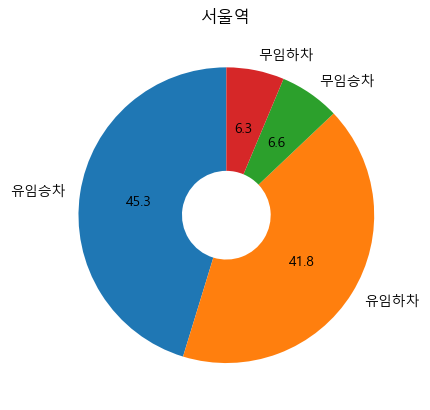

In [38]:
plt.pie(data, labels= data.index , startangle= 90, wedgeprops={'width':0.7}, autopct='%0.1f' )
plt.title(df.loc[ 0 , '지하철역' ])
plt.show()

In [39]:
df.head(3)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985


In [41]:
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735,1.816531
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687,2.075986
...,...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629,3.263665
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092,1.922061
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648,2.441451
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109,1.981258


In [42]:
df['지하철역'].value_counts().size

509